# DATA AUGMENTATION

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_data_gen = ImageDataGenerator(rescale = 1./255,
                                    zoom_range = 0.2,
                                    horizontal_flip = True,
                                    vertical_flip = True)

In [3]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
xtrain = train_data_gen.flow_from_directory(r"C:\Users\nadee\Documents\flowers",target_size=(64,64),
                                           class_mode='categorical',
                                           batch_size=100)

Found 4317 images belonging to 5 classes.


In [10]:
xtest = test_datagen.flow_from_directory(r"C:\Users\nadee\Documents\flowers",
                                         target_size=(64,64),
                                         class_mode='categorical',
                                         batch_size=100)

Found 4317 images belonging to 5 classes.


In [5]:
xtrain.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

# CNN MODEL

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [7]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation = 'relu',input_shape = (64,64,3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(300,activation = 'relu'))
model.add(Dense(5,activation = 'softmax'))

In [8]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [11]:
model.fit(xtrain, steps_per_epoch = len(xtrain),epochs = 10,
          validation_data = xtest,validation_steps = len(xtest))

Epoch 1/10
44/44 [==============================] - 86s 2s/step - loss: 1.6399 - accuracy: 0.3889 - val_loss: 1.2321 - val_accuracy: 0.4964
Epoch 2/10
44/44 [==============================] - 50s 1s/step - loss: 1.1268 - accuracy: 0.5363 - val_loss: 1.0621 - val_accuracy: 0.5724
Epoch 3/10
44/44 [==============================] - 51s 1s/step - loss: 1.0393 - accuracy: 0.5828 - val_loss: 0.9673 - val_accuracy: 0.6252
Epoch 4/10
44/44 [==============================] - 50s 1s/step - loss: 1.0010 - accuracy: 0.6166 - val_loss: 0.9441 - val_accuracy: 0.6347
Epoch 5/10
44/44 [==============================] - 51s 1s/step - loss: 0.9553 - accuracy: 0.6352 - val_loss: 0.9564 - val_accuracy: 0.6345
Epoch 6/10
44/44 [==============================] - 51s 1s/step - loss: 0.8963 - accuracy: 0.6542 - val_loss: 0.8382 - val_accuracy: 0.6838
Epoch 7/10
44/44 [==============================] - 51s 1s/step - loss: 0.8925 - accuracy: 0.6574 - val_loss: 0.8722 - val_accuracy: 0.6609
Epoch 8/10
44/44 [==

# SAVING THE MODEL

In [12]:
model.save("flowerss.h5")

# TESTING THE MODEL

In [13]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [17]:
model = load_model("flowerss.h5")

In [22]:
img = image.load_img("422094774_28acc69a8b_n.jpg",target_size = (150,150))

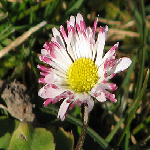

In [23]:
img

In [24]:
img = image.load_img("422094774_28acc69a8b_n.jpg",target_size = (64,64))
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred = np.argmax(model.predict(x))
op = ['daisy','dandelion','rose','sunflower','tulip']
op[pred]

1/1 [==============================] - 0s 237ms/step


'daisy'

In [25]:
img = image.load_img("440714501_9f8268e1b0.jpg",target_size = (64,64))
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred = np.argmax(model.predict(x))
op = ['daisy','dandelion','rose','sunflower','tulip']
op[pred]

1/1 [==============================] - 0s 56ms/step


'tulip'